# Classification Trees and Forests -- Sales Level Prediction

In this notebook, we will predict the sales level (high or low) of car seats. 

## The dataset

Let's first load the dataset from a csv file, which contains sales volumes of a car seat product at various retail locations, as well as factors that potentially affect sales. 

In [1]:
import pandas as pd

carseats = pd.read_csv("https://raw.githubusercontent.com/zhouy185/BUS_O712/refs/heads/main/Data/carseats.csv")

In [2]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Summarize the dataset.

In [3]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Each row corresponds to a retail location.

The dataset includes the following variables.

* **Sales**: Quarterly sales volume in thousands of units.
* **CompPrice**: Competitor's price of the same product.
* **Advertising**: Local ad budget at each location in 1000s of dollars.
* **Price**: price for car seats at each site

* **Income**: Income level in 1000s of dollars, in the region of the retail location.
* **Population**: regional pop in thousands.
* **Age**: average age of the population
* **Education**: average education level of in the region, measured by years of education on average received by the local residents

* **Urban**: Yes/No; indicates if the location is in a rurual or urban area.
* **US**: Yes/No; indicates if the location is in the U.S.

* **ShelveLoc**: Bad, Good or Medium indicates attractiveness of shelving location.




Consider **7 thousand** units as the benchmark sales volume. 
* We will label any sales volume as **high** if it exceeds 7, and low if it is below 7.


We will:
* **create** a new column to indicate if a retail location's sales volume is **high**.
* drop the *Sales* column, as we will predict the sales level (high or low) instead of the sales number.

In [7]:
carseats['High_Sales'] = (carseats['Sales']>=7).astype(int)
carseats.drop('Sales',axis=1,inplace=True)
carseats.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,0


Let check the labels in the new variable.

In [8]:
carseats['High_Sales'].value_counts()

High_Sales
1    216
0    184
Name: count, dtype: int64

## Preprocessing (one-hot encoding)

Check the categgories in each categorical variable.

In [9]:
carseats.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,0


Let's perform one-hot encoding on the categorical varaible.

In [11]:
carseats_encoded = pd.get_dummies(carseats,columns=['ShelveLoc','Urban','US'], 
                                  drop_first=True, dtype=int)
carseats_encoded.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,High_Sales,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,1,0,0,1,1
1,111,48,16,260,83,65,10,1,1,0,1,1
2,113,35,10,269,80,59,12,1,0,1,1,1
3,117,100,4,466,97,55,14,1,0,1,1,1
4,141,64,3,340,128,38,13,0,0,0,1,0


Split the dataset into features and target.

In [15]:
X = carseats_encoded.drop('High_Sales',axis=1)

y = carseats_encoded['High_Sales']

Train-test split:

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=28,stratify=y)

## Decision tree model

We will now build a decision tree model using the `DecisionTreeClassifier()` function, which is included in the module `tree` of the `sklearn` library.

The training process of a decision tree model focuses on how to split the nodes.
Parameters such as depth of the tree, minimum samples in a leaf node, etc., are given to the model as hyperparameters.

We may specify the hyperparameters to keyword arguments.

If not specified, default values will be used.

In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC
 
tree = DTC(
    criterion = 'entropy',
    max_depth = 4,
    min_samples_split = 5, 
    min_samples_leaf = 3, 
    max_features = 'sqrt',
    ccp_alpha = 0.01,
    random_state = 28
)

See the following tables for the hyperparameters for building a decision tree for classification.

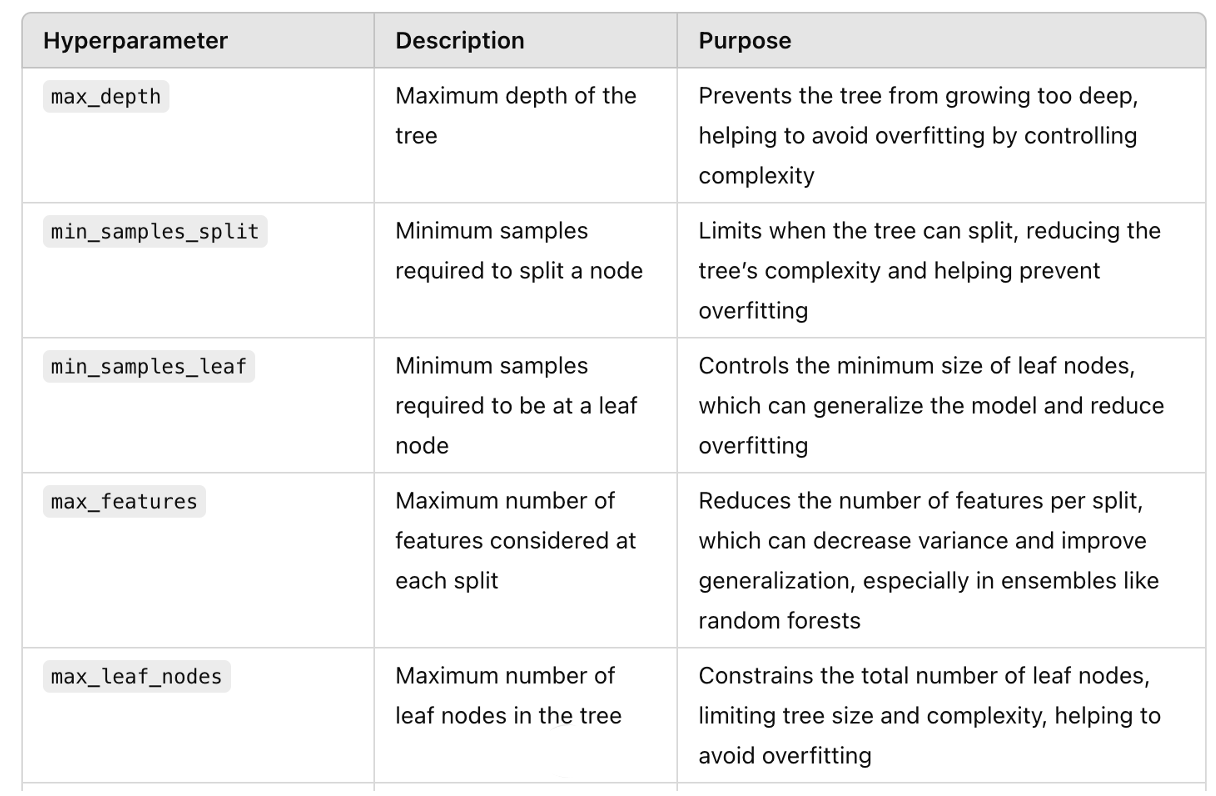</img>

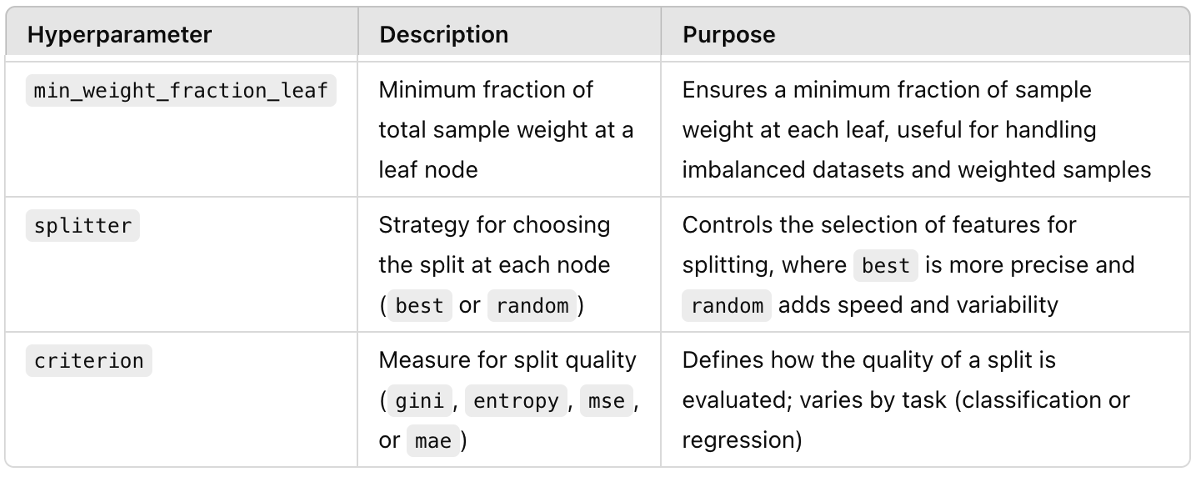</img>

Default values of the hyperparameters:

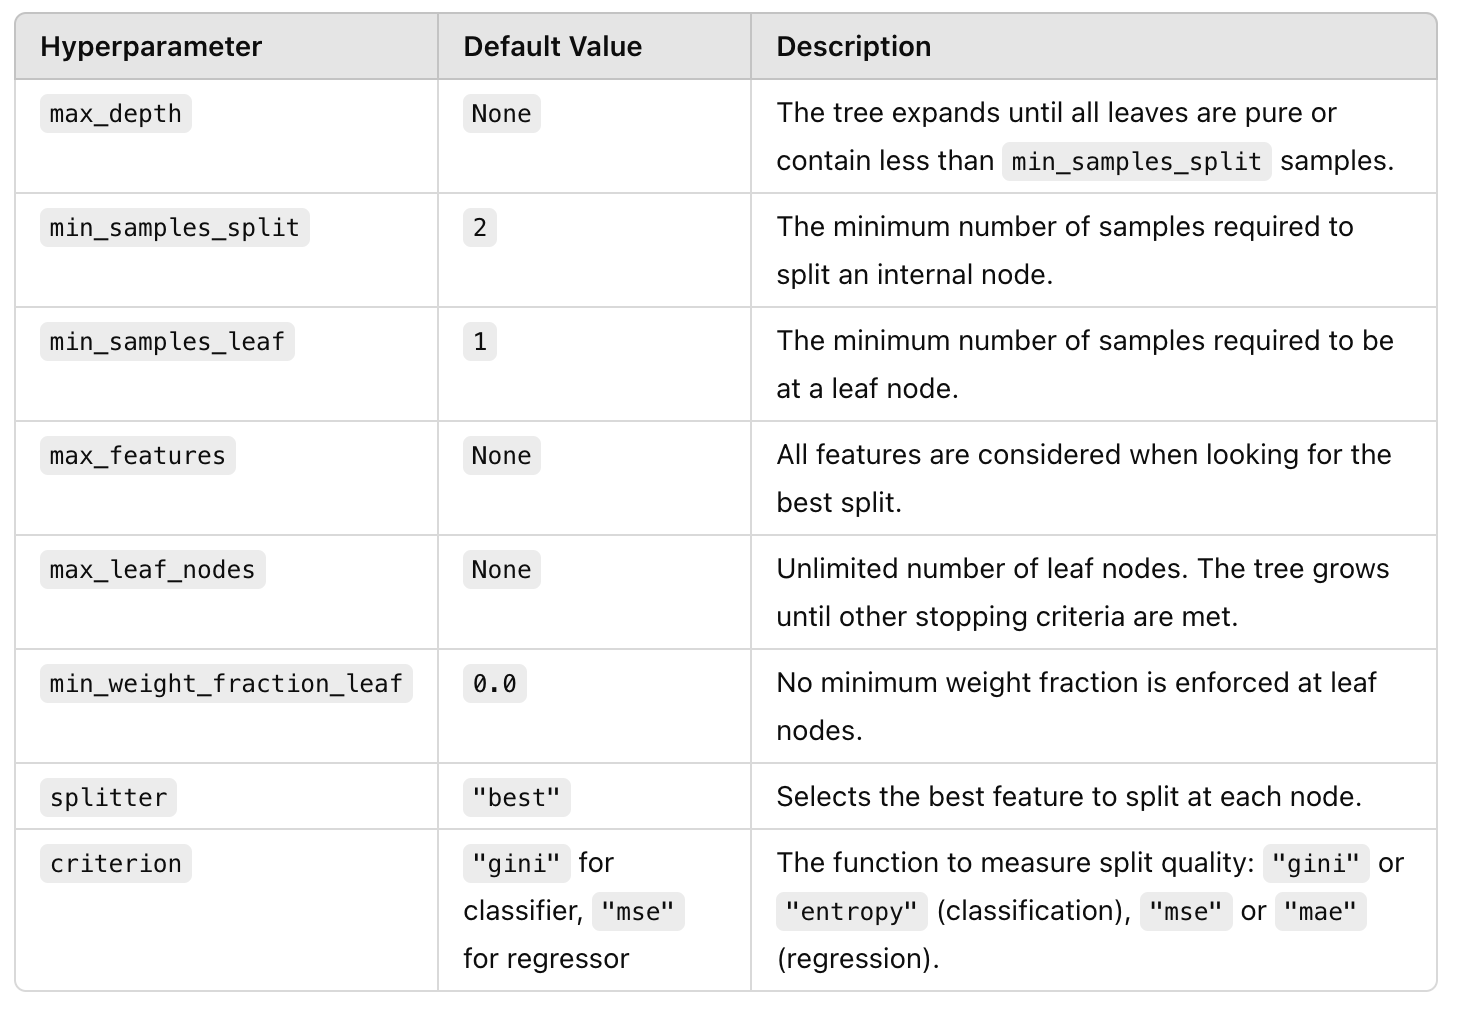</img>

We can fit the model to the training data by the `.fit()` function.

In [19]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4,
                       max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, random_state=28)

Let's make predictions on the test set.

In [20]:
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

We will obtain the confusion matrix, classification report, and the AUC score to evaluation the model performance.

In [21]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)

In [22]:
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        37
           1       0.67      0.67      0.67        43

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80



AUC score:

## Cross-validation

We will use a 10-fold cross-validation. 

In [1]:

# CV strategy 

# Get the scores for each train-test split in CV


The attribute `feature_importances_` of the trained model shows the importance of the features.

## Plot the fitted tree

We may plot the fitted tree using the `plot_tree()` function.

The tree shows how we splitted each node (if not a leaf node), along with other information.


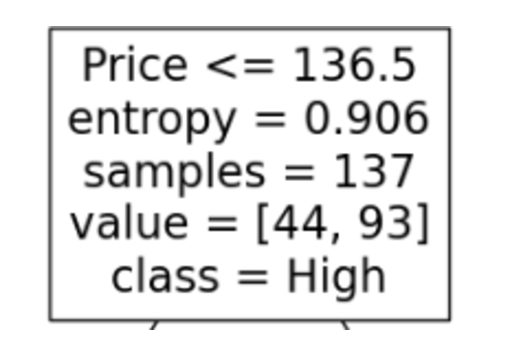</img>

Example:
* Split the samples according to whether  **Prices** is above or below 136.5
* **entropy** as a measure shows the impurity level of the node
* a total of 137 samples in this node 
    * 44 of them has 'low' sales, and 93 of then 'high' sales
    * totaling 137 samples
* If this node were a leaf node, the prediction will be 'high' for the sample points in this node

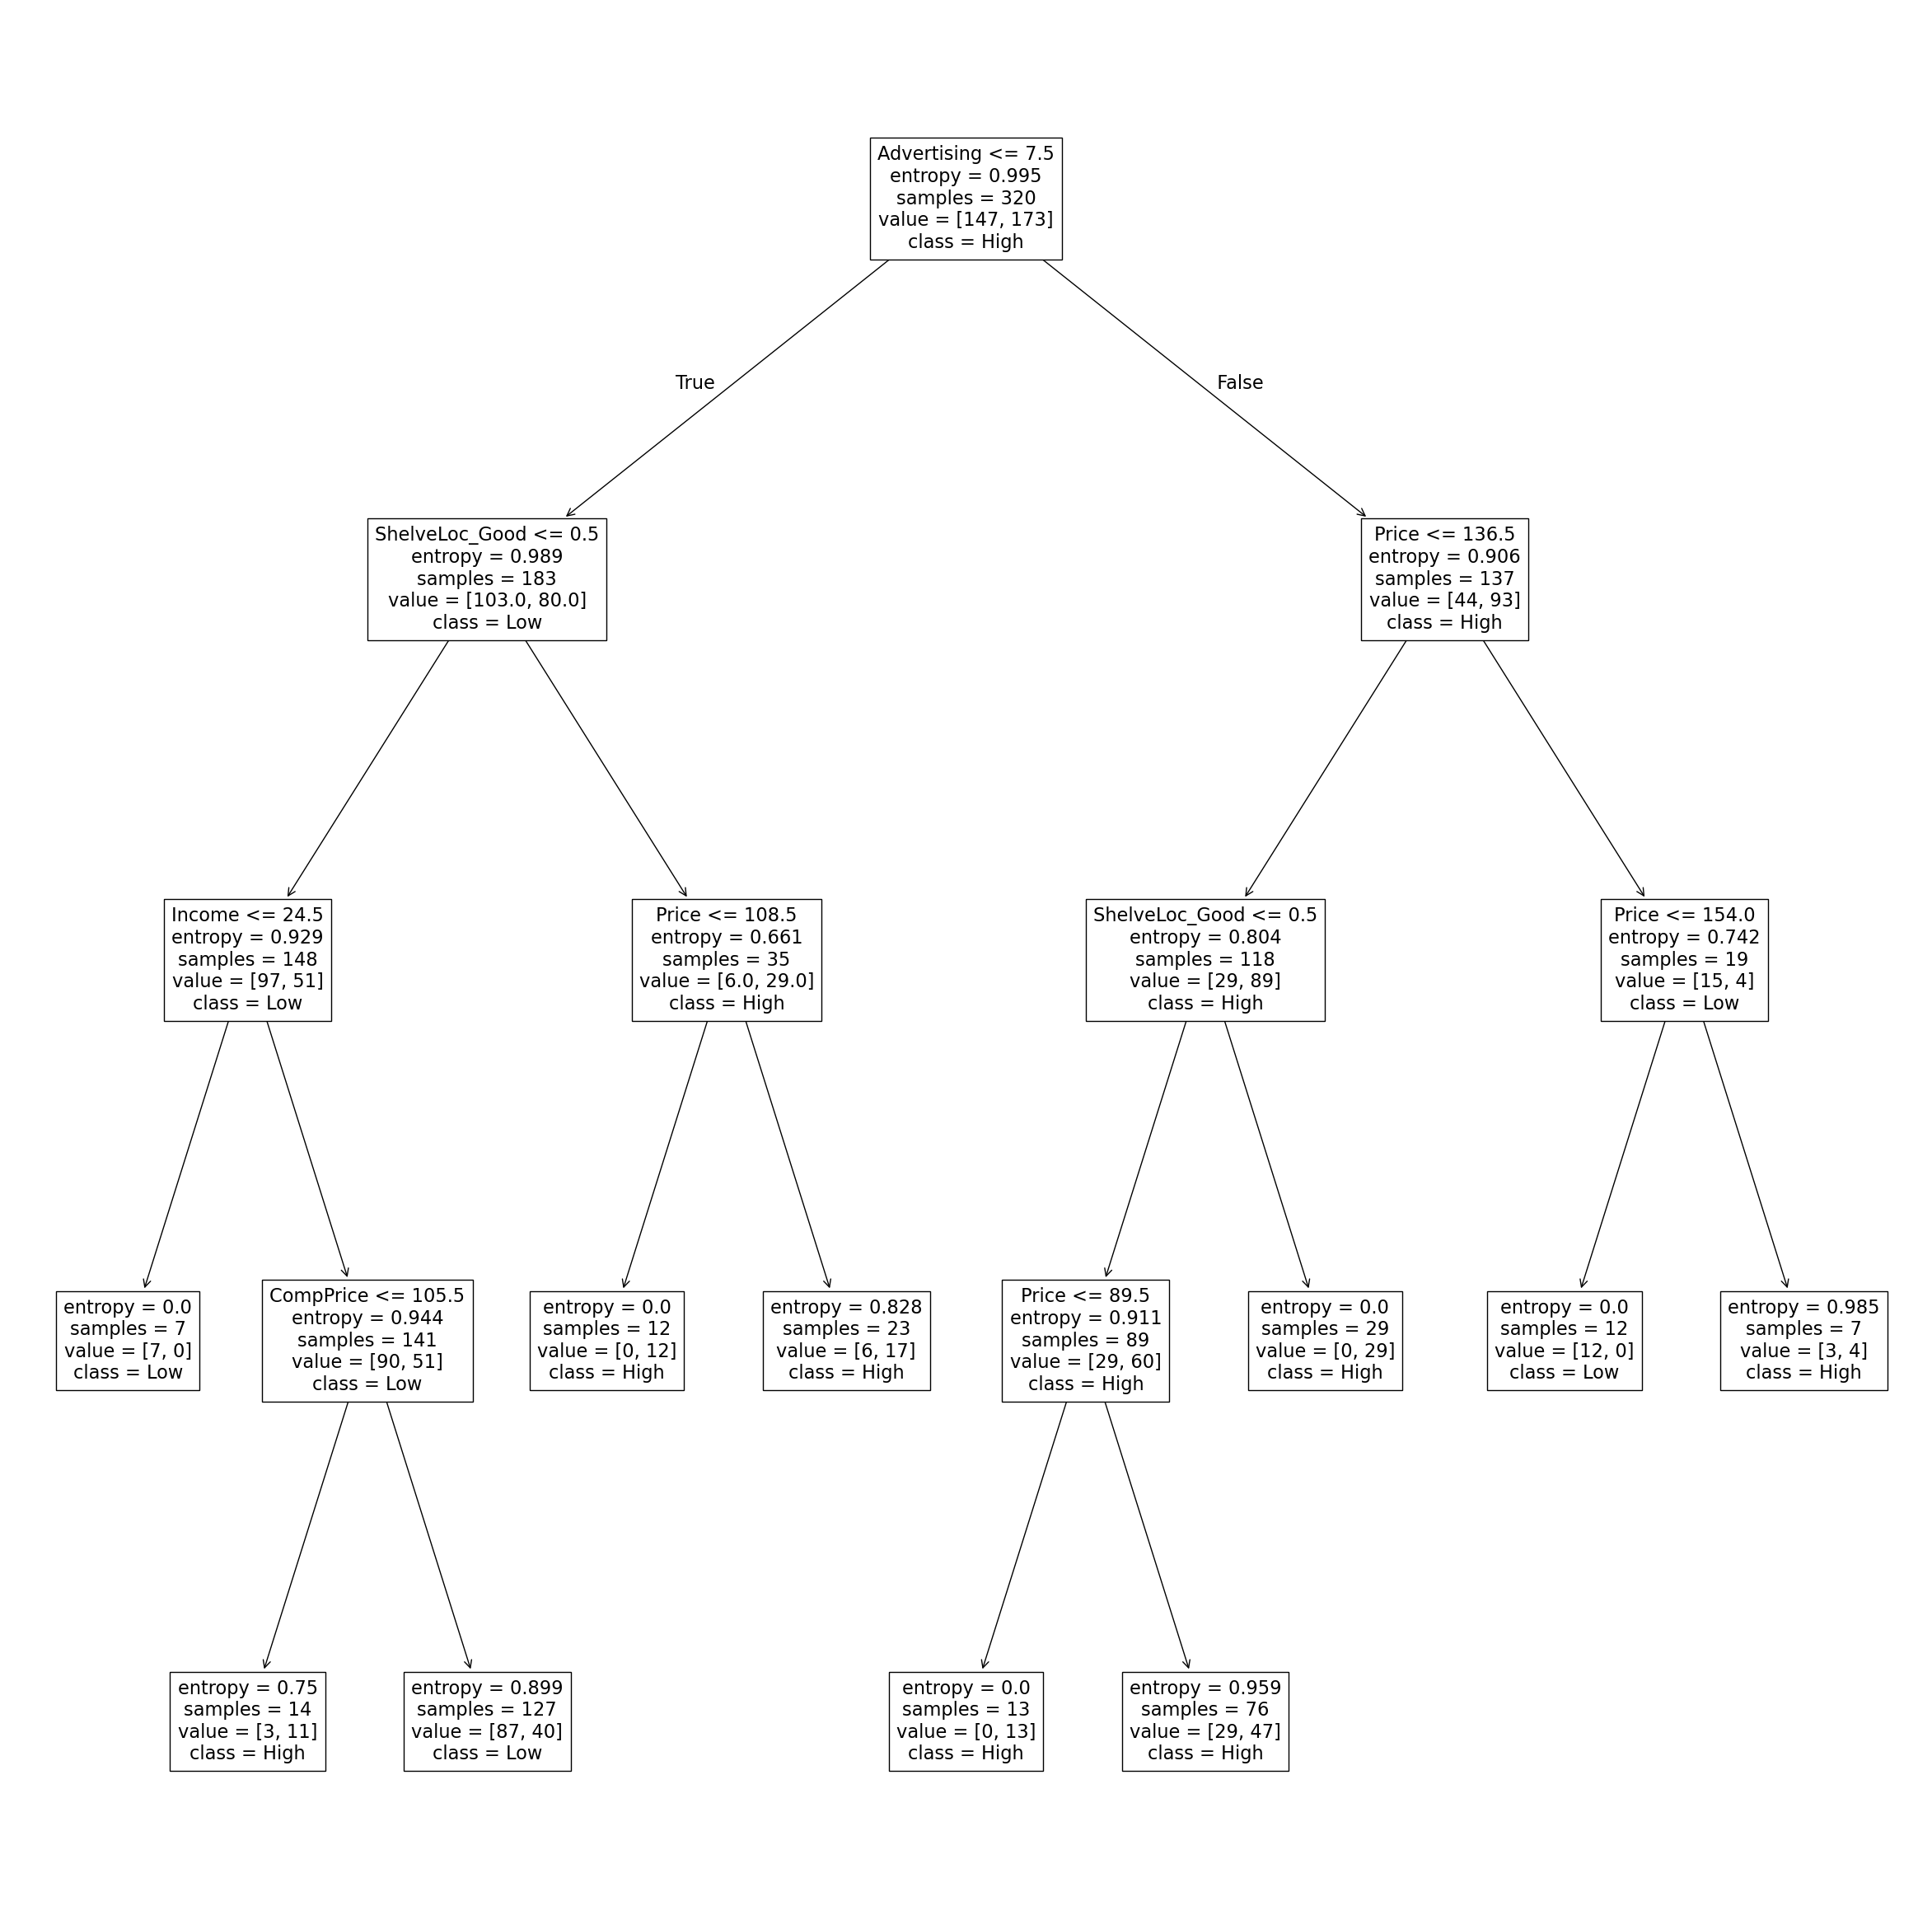

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

plot_tree(tree, feature_names=X.columns,class_names=['Low','High'])
plt.show()

## Random Forest

A random forest an **ensemble** method based on a certain number of decisions tree. The number of trees, $B$, is a hyperparameter. 

To construct each tree in the random forest:
* (Bootstraping) Sample the same number of data records (i.e., rows; in the current example, 400 rows) from the original dataset, **with replacement**.

**Note**: Bootstraping is a widely used sampling technique to create multiple samples from one original sample.

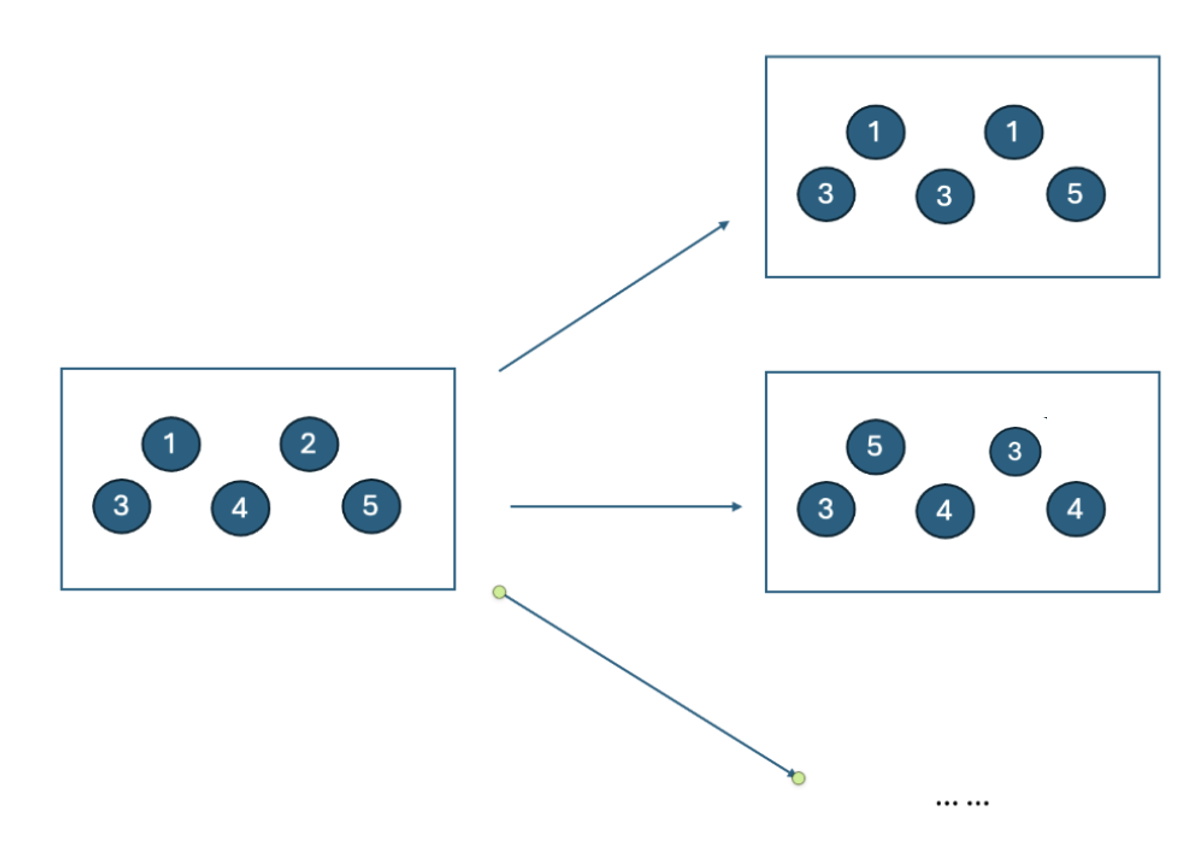</img>

* For the bootstrapped sample, construct a decision tree.

* For any new data point not in the training dataset, make a prediction based on each of the $B$ decision trees.
* Average over all the $B$ trees to get the ensemble prediction.

We will need to import the `RandomForestClassifier()` method from the `ensemble` module in `sklearn`. 

In addition to the hyperparameters for the individual trees, we also have:
* `n_estimators`: total number of trees to construct 
    * default value is 100
* `bootstrap`: if set to False, each tree will be constructed based on the same dataset (the original dataset)
    * default value: True

* `oob_score`: Whether to use the 'out of bag' method to evaluate the performance scores
    * with the trees based on bootstrapped samples from the original dataset, there are usually data records never selected to construct any of the trees, i.e., unseen by the model during training. 
     * if `oob_score` is set to True, then we will evalute the performance score on those unselected data records; in other words, they serve as the test data.
     * default value is false

Now we can fit the random forest model.

Making predictions.

Creating the confusion matrix and classification report.

Perform cross-validation. Recall that:
* Specify the model, features (X), and target (y) in the positional arguments 
* `scoring=` specifies the performance score
* `cv=` specifies the cross validation strategy

## Hyperparameter tuning

To select hyperparameters with good performance, we first define the space of hyperparameters to search over, in the form of a dictionary.

In the following, we will use `RandomizedSearchCV` to randomly select parameter combinations from the search space and evaluate the performance.

It has the following keyword arguments:
* `estimator=` specifies the model to perform the research with
* `param_distributions=` specifies the search space to use
* `n_iter=` is how many combinations we will try out
* `scoring` specifies the performance metric
* `n_jobs=` specifies the number of cpu cores to use for the search; -1 represents the use of all available cores.
* `random_state=` is for reproducibility

Define the search:

Conduct the search by `.fit`:

Note that we used `.fit()` on the training dataset only. This means that during the fitting process:
* we did not make use of the test data
* `X_train` and `y_train` are further splitted into subsets (training and validation sets).

After fitting the RandomSearchCV, we may use `.best_params_` attribute of the search to find the best hyperparameters.

We may use `.best_estimator_` attribute to find the best model (i.e., the one with the best performing hyperparameters).

With the best model, we can evaluate the performance of the model on the test dataset.